# **(Part_6: Automate the ML process using pipelines)**

## Objectives

Compare with other classification methods
   * Decision trees with **`tree.DecisionTreeClassifier()`**
   * K-nearest neighbors with **`neighbors.KNeighborsClassifier()`**
   * Random forests with **`ensemble.RandomForestClassifier()`**
   * Perceptron (both gradient and stochastic gradient) with **`mlxtend.classifier.Perceptron`**
   * Multilayer perceptron network (both gradient and stochastic gradient) with **`mlxtend.classifier.MultiLayerPerceptron`**

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Breast-Cancer-Prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Breast-Cancer-Prediction'

---

# Automate the ML process using pipelines 

There are standard workflows in a machine learning project that can be automated. In Python scikit-learn, Pipelines help to clearly define and automate these workflows.
* Pipelines help overcome common problems like data leakage in your test harness. 
* Python scikit-learn provides a Pipeline utility to help automate machine learning workflows.
* Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.

# Data Preparation and Modeling Pipeline

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import joblib

# Create a pipeline that standardizes the data then creates a model
#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# visualization
import seaborn as sns 

plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'


# Evaluate Some Algorithms

Now it is time to create some models of the data and estimate their accuracy on unseen data. Here is what we are going to cover in this step:

1.	Separate out a validation dataset.

2.	Setup the test harness to use 10-fold cross validation.

3.	Build 5 different models

4.	Select the best model


# Dataset Validation

In [5]:
#load data
df = pd.read_csv('outputs/datasets/cleaned/data.csv', index_col=False)

# Split-out validation dataset
array = df.values
X = array[:,1:31]
y = array[:,0]

# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)


# Evaluate Algorithms: Baseline

In [6]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7 
scoring = 'accuracy'

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7 
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print('\n➔ 10-Fold cross-validation accurcay score for the training data for six classifiers') 


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

LR: 0.944808 (0.026834)

➔ 10-Fold cross-validation accurcay score for the training data for six classifiers
LDA: 0.954744 (0.018784)

➔ 10-Fold cross-validation accurcay score for the training data for six classifiers
KNN: 0.937179 (0.028218)

➔ 10-Fold cross-validation accurcay score for the training data for six classifiers
CART: 0.934744 (0.043504)

➔ 10-Fold cross-validation accurcay score for the training data for six classifiers
NB: 0.937115 (0.040822)

➔ 10-Fold cross-validation accurcay score for the training data for six classifiers
SVM: 0.901987 (0.047020)

➔ 10-Fold cross-validation accurcay score for the training data for six classifiers


In [7]:
len(X_train)

398

# Observation

The results suggest That both Logistic Regression and LDA may be worth further study. These are just mean accuracy values. It is always wise to look at the distribution of accuracy values calculated across cross validation folds. We can do that graphically using box and whisker plots.


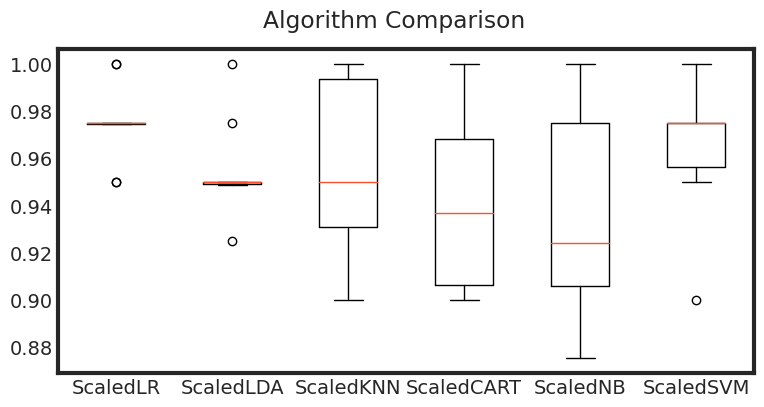

['outputs/datasets/models/algorithm_comparison.pkl']

In [18]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
joblib.dump(fig, 'outputs/datasets/models/algorithm_comparison.pkl')


# Observation

The results show a similar tight distribution for all classifiers except SVM which is encouraging, suggesting low variance. The good results for SVM are satisfactory.

It is possible the varied distribution of the attributes may have an effect on the accuracy of algorithms such as SVM. In the next section we will repeat this spot-check with a standardized copy of the training dataset.


# Evaluate Algorithms: Standardize Data

In [9]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:  
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
      scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.974936 (0.015813)
ScaledLDA: 0.954744 (0.018784)
ScaledKNN: 0.957372 (0.033665)
ScaledCART: 0.939808 (0.033810)
ScaledNB: 0.937115 (0.039261)
ScaledSVM: 0.967436 (0.027483)


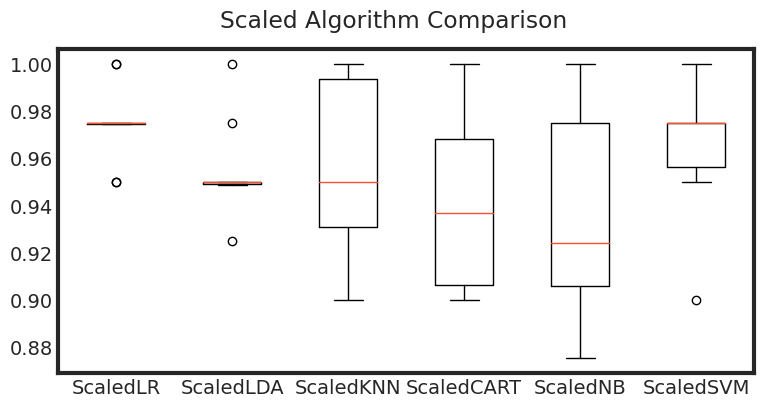

['outputs/datasets/models/scaled_algorithm_comparison.pkl']

In [19]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
joblib.dump(fig, 'outputs/datasets/models/scaled_algorithm_comparison.pkl')

# Observations

The results show that standardization of the data has lifted the skill of SVM to be the most accurate algorithm tested so far.
The results suggest digging deeper into the SVM and LDA and LR algorithms. It is very likely that configuration beyond the default may yield even more accurate models.


# Algorithm Tuning

In this section we investigate tuning the parameters for three algorithms that show promise from the spot-checking in the previous section: LR, LDA and SVM.

Tuning hyper-parameters - SVC estimator

In [11]:
#Make Support Vector Classifier Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False))])

#Fit Pipeline to training Data
pipe_svc.fit(X_train, y_train)

#print('➝ Fitted Pipeline to training Data')

scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)
print('➔ Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=1)
gs = gs.fit(X_train, y_train)
print('➔ Tuned Parameters Best Score: ',gs.best_score_)
print('➔ Best Parameters: \n',gs.best_params_)



➔ Model Training Accuracy: 0.940 +/- 0.034
➔ Tuned Parameters Best Score:  0.9446794871794871
➔ Best Parameters: 
 {'clf__C': 1.0, 'clf__kernel': 'linear'}


# Tuning the hyper-parameters: k-NN hyperparameters

For your standard k-NN implementation, there are two primary hyperparameters that you’ll want to tune:

•	The number of neighbors k.

•	The distance metric/similarity function.

Both of these values can dramatically affect the accuracy of your k-NN classifier. Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times Each time, the n_neighbors parameter should be given a different value from the list We can't give GridSearchCV just a list We've to specify n_neighbors should take on 1 through 30 You can set n_jobs = -1 to run computations in parallel (if supported by your computer and OS)


In [12]:
from sklearn.neighbors import KNeighborsClassifier as KNN

pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', KNeighborsClassifier())])
            
#Fit Pipeline to training Data
pipe_knn.fit(X_train, y_train) 

scores = cross_val_score(estimator=pipe_knn, 
                         X=X_train, 
                         y=y_train, 
                         cv=10,
                         n_jobs=1)
print('➝ Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = range(1, 31)
param_grid = [{'clf__n_neighbors': param_range}]
# instantiate the grid
gs = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=10, 
                    scoring='accuracy')
gs = gs.fit(X_train, y_train)
print('➔ Tuned Parameters Best Score: ',gs.best_score_)
print('➔ Best Parameters: \n',gs.best_params_)


➝ Model Training Accuracy: 0.927 +/- 0.044
➔ Tuned Parameters Best Score:  0.9396153846153847
➔ Best Parameters: 
 {'clf__n_neighbors': 19}


# Finalize Model

In [13]:
#Use best parameters
clf_svc = gs.best_estimator_

#Get Final Scores
clf_svc.fit(X_train, y_train)
scores = cross_val_score(estimator=clf_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

print('➔ Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('➜ Final Accuracy on Test set: %.5f' % clf_svc.score(X_test,y_test))


➔ Final Model Training Accuracy: 0.940 +/- 0.034
➜ Final Accuracy on Test set: 0.94737


In [14]:
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9473684210526315
[[113   3]
 [  6  49]]
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       116
           M       0.94      0.89      0.92        55

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



# Summary

Worked through a classification predictive modeling machine learning problem from end-to-end using Python. Specifically, the steps covered were:

1.	Problem Definition (Breast Cancer data).

2.	Loading the Dataset.

3.	Analyze Data (same scale but di↵erent distributions of data).

•	Evaluate Algorithms (KNN looked good).

•	Evaluate Algorithms with Standardization (KNN and SVM looked good).

4.	Algorithm Tuning (K=19 for KNN was good, SVM with an RBF kernel and C=100 was best)..

5.	Finalize Model (use all training data and confirm using validation dataset)


---